# **Import Necessary Libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


# **Load the Dataset**

In [ ]:
# Load the dataset
file_path = "C:\\Git\\Assignment-2\\assignment2\\ENB2012_data.xlsx"
data = pd.read_excel(file_path)

# Display first few rows of the dataset
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [41]:
data.columns= ["Relative Compactness", "Surface Area", "Wall Area", "Roof Area", "Overall Height", "Orientation", 
               "Glazing Area", "Glazing Area Distribution", "Heating Load", "Cooling Load"]
data.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [61]:
data.shape

(768, 10)

# **Data Preprocessing**

In [57]:
# Select the features and target variable
X = data[["Relative Compactness", "Surface Area", "Wall Area", "Roof Area", "Overall Height", "Orientation", 
               "Glazing Area", "Glazing Area Distribution"]]
y = data["Heating Load"]  # Heating Load

# Check for missing values
print(X.isnull().sum())
print(y.isnull().sum())

# Drop rows with missing values
X = X.dropna()
y = y.dropna()

# Split the data into 60% training, 20% validation, and 20% testing
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalize the features (important for regularized models like Ridge)
scalerX = StandardScaler()
X_train_scaled = scalerX.fit_transform(X_train)
X_val_scaled = scalerX.transform(X_val)
X_test_scaled = scalerX.transform(X_test)

# Normalize the target variable
scalery = StandardScaler()
y_train_scaled = scalery.fit_transform(y_train.values.reshape(-1, 1))
y_val_scaled = scalery.transform(y_val.values.reshape(-1, 1))
y_test_scaled = scalery.transform(y_test.values.reshape(-1, 1))

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
dtype: int64
0


# **Model Training and Hyperparameter Tuning (Ridge Regularization)**

In [65]:
# Experiment with different values of alpha (regularization strength)
alphas = np.logspace(-5, 5, 10)  # 10 values ranging from 10^-5 (0.00001) to 10^5 (100,000) spaced logarithmically
best_alpha = None
best_r2 = -np.inf
best_model_ridge = None
# this values will be updated as the loop progresses to store the best model parameters (alpha) and performance (R²) based on validation data.

# Iterate over the alphas to find the best model based on R² on validation data
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_scaled, y_train_scaled)
    y_val_pred_scaled = ridge_model.predict(X_val_scaled)
    r2 = r2_score(y_val_scaled, y_val_pred_scaled)
    
    if r2 > best_r2:
        best_r2 = r2
        best_alpha = alpha
        best_model_ridge = ridge_model

# Print the best regularization strength and the corresponding model's R²
print(f"Best Ridge Model (α = {best_alpha:.5f}):")  # format with 5 decimal places
print(f"R² on Validation Data: {best_r2:.4f}")

Best Ridge Model (α = 0.00001):
R² on Validation Data: 0.9050


# **Final Evaluation on Test Data**  
**After identifying the best model, we need to test its performance on unseen data (the test set).**

Final Evaluation on Test Data (Ridge Model):
R²: 0.9196
MSE: 0.0784


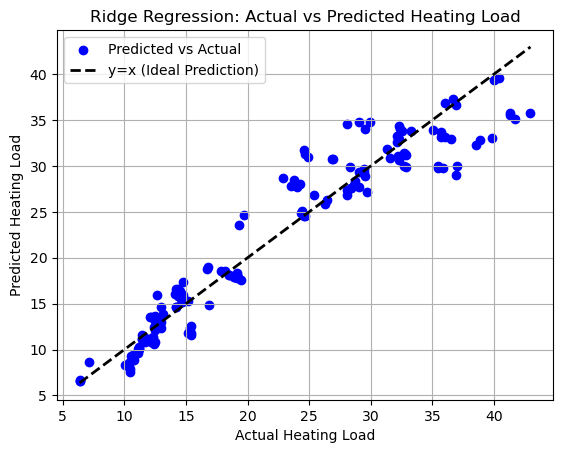

In [39]:
# Predict on the test set using the best Ridge model
y_test_pred_scaled = best_model_ridge.predict(X_test_scaled) # use the best_model_ridge to make predictions on the scaled test data (X_test_scaled).
# The output, y_test_pred_scaled, is the predicted target variable for the test set, but in the scaled form (since we standardized the data earlier).

# Evaluate on the test set
# Calculates the MSE between the actual test values (y_test_scaled) and the predicted test values (y_test_pred_scaled).
mse_test = mean_squared_error(y_test_scaled, y_test_pred_scaled) # The smaller the MSE the better.
# Calculates the R² (R-squared) score for the test data
# values closer to 1 indicates model explains a large portion of the variance in the target variable. Values closer to 0 indicate poor performance.
r2_test = r2_score(y_test_scaled, y_test_pred_scaled)

# Transform predictions back to the original scale
y_test_pred = scalery.inverse_transform(y_test_pred_scaled)
y_test_actual = scalery.inverse_transform(y_test_scaled)

print(f"Final Evaluation on Test Data (Ridge Model):")
print(f"R²: {r2_test:.4f}")
print(f"MSE: {mse_test:.4f}")

# Plot Actual vs Predicted values for the test data
plt.scatter(y_test_actual, y_test_pred, label='Predicted vs Actual', color='blue')
plt.plot([min(y_test_actual), max(y_test_actual)], [min(y_test_actual), max(y_test_actual)], 'k--', lw=2, label='y=x (Ideal Prediction)')

# Add labels and a legend
plt.xlabel('Actual Heating Load')
plt.ylabel('Predicted Heating Load')
plt.title('Ridge Regression: Actual vs Predicted Heating Load')
plt.legend()
plt.grid(True)
plt.show()

# **Model Coefficients and Feature Importance**

Top 5 Features based on Ridge Coefficients: ['X5', 'X1', 'X4', 'X2', 'X7']
Top 5 Feature Coefficients: [ 0.72512402 -0.62840478 -0.37275065 -0.3434221   0.26911441]


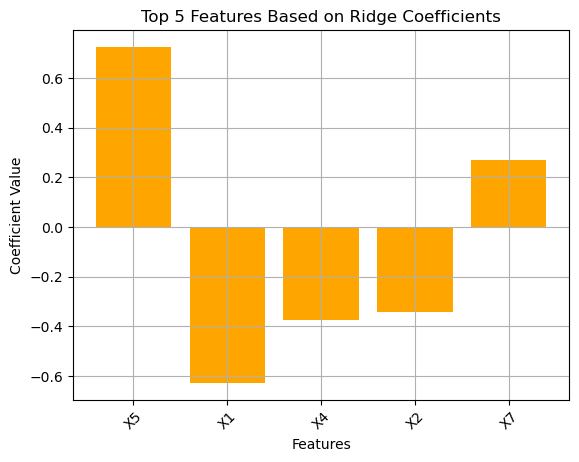

In [24]:
# Assuming best_model_ridge is just the Ridge model, not a pipeline
ridge_coefficients = best_model_ridge.coef_[0]  # Ridge coefficients (1D array)
ridge_intercept = best_model_ridge.intercept_

# Calculate feature importance (absolute value of coefficients)
feature_importance = np.abs(ridge_coefficients) # Just to ignore the sign and focus on how strongly each feature influences the target variable

# Get the top 5 features based on the absolute value of coefficients
top_5_features_idx = np.argsort(feature_importance)[::-1][:5]  # Indices of the top 5 features / This is originally in ascending order
# [::-1] reverses the order, so we get the indices sorted in descending order and [:5] selects the top 5 features based on their importance.

# Access the feature names based on the sorted indices
top_5_features = X.columns[top_5_features_idx].to_list()  # Convert to list of feature names
top_5_coefficients = ridge_coefficients[top_5_features_idx] # retrieves the coefficients corresponding to the top 5 features.

print(f"Top 5 Features based on Ridge Coefficients: {top_5_features}")
print(f"Top 5 Feature Coefficients: {top_5_coefficients}")

# Plot the coefficients for visualization
plt.bar(top_5_features, top_5_coefficients, color='orange')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Top 5 Features Based on Ridge Coefficients')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**Key Points:**

**Feature Importance:** The length of the bar indicates the relative importance of the feature. Longer bars correspond to features that have a greater impact on the target variable.
Coefficient Direction:

**Positive Coefficient:** A positive coefficient means that as the feature value increases, the target variable tends to increase as well.

**Negative Coefficient:** A negative coefficient means that as the feature value increases, the target variable tends to decrease.

**Feature 'X5':** Has the highest positive coefficient, suggesting that increasing 'X5' tends to increase the target variable.  
**Feature 'X1':** Has the second-highest negative coefficient, indicating that increasing 'X1' tends to decrease the target variable.  
**Other Features:** The remaining features ('X4', 'X2', and 'X7') have smaller coefficients, implying a lesser impact on the target variable.

# **Evaluating with Top 5 Features**

In [74]:
# Select only the top 5 features based on Ridge coefficients
X_top_5 = X.iloc[:, top_5_features_idx]

# Split the data again and normalize the top 5 features
X_train_top5, X_temp, y_train_top5, y_temp = train_test_split(X_top_5, y, test_size=0.4, random_state=42)
X_val_top5, X_test_top5, y_val_top5, y_test_top5 = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_train_top5_scaled = scalerX.fit_transform(X_train_top5)
X_val_top5_scaled = scalerX.transform(X_val_top5)
X_test_top5_scaled = scalerX.transform(X_test_top5)

# Train Ridge Model with the top 5 features
ridge_model_top5 = Ridge(alpha=best_alpha)
ridge_model_top5.fit(X_train_top5_scaled, y_train_scaled)

# Evaluate on the test set
y_test_top5_pred_scaled = ridge_model_top5.predict(X_test_top5_scaled)
r2_top5 = r2_score(y_test_scaled, y_test_top5_pred_scaled)

print(f"R² using Top 5 Features (Ridge Model): {r2_top5:.4f}")

# Calculate Mean Squared Error (MSE)
mse_top5 = mean_squared_error(y_test_scaled, y_test_top5_pred_scaled)
print(f"Mean Squared Error using Top 5 Features (Ridge Model): {mse_top5:.4f}")

R² using Top 5 Features (Ridge Model): 0.9195
Mean Squared Error using Top 5 Features (Ridge Model): 0.0785


# **1. Impact of Removing Certain Features**  
**What happens when you remove certain features?** Removing features may degrade the model's performance if the removed features carry significant predictive power. Alternatively, removing irrelevant or noisy features can improve model performance by reducing overfitting and improving generalization.  
# **2. Importance of Data Splitting**  
**Why is it necessary to split the data?** Data should be split into training, validation, and testing sets to ensure that the model generalizes well to unseen data. If you use the same data for training and testing, the model might memorize the data (overfitting) and fail to generalize to new, unseen data.  
**Consequences of skipping this step?** If you skip this step, your model might have inflated performance metrics, but it will likely perform poorly when deployed in the real world, where it will encounter new data.  
# **3. Generalization Ability**  
**How is generalization assessed?** The model's ability to generalize is assessed by its performance on the test data, which is data that it has never seen before. A high R² and low error on the test set indicate good generalization.  
**Steps to ensure good generalization:**  
Use cross-validation during model selection (not just a single validation split).  
Regularize the model (as done with Ridge) to avoid overfitting.  
Ensure that the test set is kept separate from the training process to provide an unbiased estimate of model performance on new data.  
